##### Title: Monitoring how RTT varies based on the geolocation of the target
##### Author: Lotito Davide Pio
##### Date: 
<img src="./images/logoUnipvST.jpg" width="75" height="75">

## Some useful imports

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import getCoordinate
import os

## Read the file 

In [2]:
df = pd.read_json("../sample.txt")
df

,destination,date,time,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT
0,142.251.209.14,2022-04-10,08:28:28,0%,9012ms,12.323,15.037,23.502,3.502
1,31.13.86.36,2022-04-10,08:28:28,0%,9012ms,11.742,14.680,21.308,3.298
2,140.82.121.4,2022-04-10,08:28:28,0%,9014ms,20.891,22.026,24.049,0.977
3,13.107.42.14,2022-04-10,08:28:28,0%,9013ms,12.079,14.373,24.648,3.552


## Sort in ascending order by RTT

In [3]:
df.sort_values('avgRTT')

,destination,date,time,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT
3,13.107.42.14,2022-04-10,08:28:28,0%,9013ms,12.079,14.373,24.648,3.552
1,31.13.86.36,2022-04-10,08:28:28,0%,9012ms,11.742,14.680,21.308,3.298
0,142.251.209.14,2022-04-10,08:28:28,0%,9012ms,12.323,15.037,23.502,3.502
2,140.82.121.4,2022-04-10,08:28:28,0%,9014ms,20.891,22.026,24.049,0.977


## Coordinate degli IP

In [4]:
IP_list = df['destination'].tolist()

## Plottare posizione sulla mappa degli IP

/home/davide/.local/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


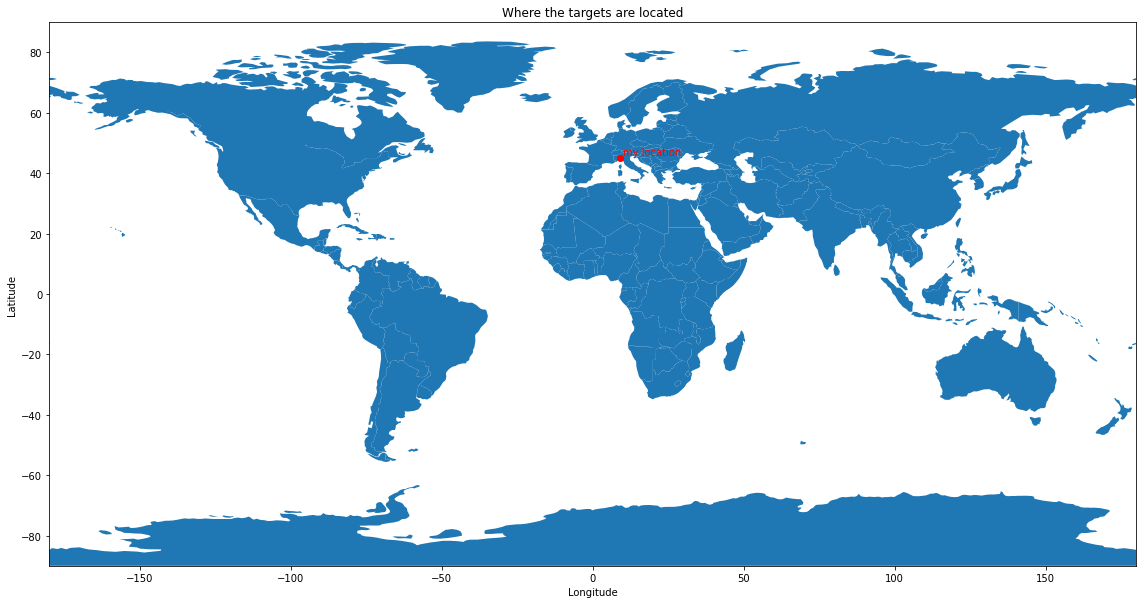

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

points = gpd.GeoDataFrame()
# punto = Point(longitudine, latitudine)
my_points = []

for ip in IP_list:
    point = Point(getCoordinate.coordinates(ip))
    os.system("sleep 1")# wait because of the free-API
    my_points.append(point)

points["geometry"] = gpd.GeoSeries(my_points)
ax = world.plot()
points.plot(color="k", ax=ax)

my_point = Point(9, 45)
my_location = gpd.GeoSeries(my_point)
my_location.plot(color="r", ax=ax)

plt.text(my_point.x+1,my_point.y+1,"my location", color='red')
plt.rcParams["figure.figsize"] = (25, 10)
plt.title("Where the targets are located")
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Calcolare distanza tra la mia posizione e IP target